In [ ]:
"""
Work for Applied Problem 1: 

Cross-Validation.  For this problem, you can consider binary classification of
the digits 3 and 8.  Code up K-fold cross-validation (from scratch) and use your 
function to tune hyper-parameters for sparse logistic regression and linear SVMs. 
Plot the cross-validation error curve along with the training and test error.  
Compare which hyperparameters your cross-validation procedure selects to those
from builtin  functions.   Reflect  on  your  results.   (Hint:  You  may  consider
using  the  logistic  log-likelihood  or binomial deviance loss instead of the 
miss-classification error for this problem.)
"""


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("../../../machine_learning_tools/")

In [3]:
import sklearn_utils as sklu
import sklearn_models as sklm
import visualizations_ml as vml

In [4]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Data

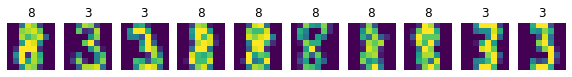

In [5]:
#Load data
n_classes = 10
digits = load_digits(n_class=n_classes)
X = digits.images
y = digits.target
n_total = X.shape[0]

#Shuffle the data
ind = np.random.permutation(n_total)
X = X[ind,:,:]
y = y[ind]

#filtering for only the 3 and 8 digits
three_eight_maks = (y == 3) | (y == 8)
X = X[three_eight_maks]
y = y[three_eight_maks]

#Plot
n_images = 10
plt.figure(figsize=[n_images,n_images])
for i in range(n_images):
    plt.subplot(1,n_images,i+1)
    plt.imshow(X[i])
    plt.axis('off')
    plt.title(str(y[i]))
plt.show()

In [6]:
#reshaping data into dataframe
X_flat = X.reshape(len(X),-1)
X = pd.DataFrame.from_records(X_flat)
y_ones = np.ones(len(X)).astype("int")
y_ones[y == 3] = 0
y = pd.Series(y_ones)

# The Models that will be used

In [7]:
# sparse logistic regression
from sklearn import linear_model
linear_model.LogisticRegression(penalty = "L1")

"""
For logistic regression the C is the only hyper parameters
C: inverse of regularization strength, smaller values are more regularized
"""

#linear svm
from sklearn.svm import SVC
SVC(kernel = "linear")

"""
Only parameter to optimize for is C, regularization 
(L2 norm pernalty)
"""

'\nOnly parameter to optimize for is C, regularization \n(L2 norm pernalty)\n'

# Implementing K-fold Cross Validation by Hand

In [8]:
"""
Purpose: To implement K-fold Cross validation
for picking the right regularization parameter on 
all of the models

Pseudocode: 
0) Define the parameter space to iterate over
1) Split the Data into,test,training and validation
2) Combine the validation and training datasets
in order to do cross validation
3) Compute the datasets for each cross validation 

For every parameter option:
    For every K fold dataset:
        Train the model on the dataset
        Measure the MSE or another loss for that model
        Store the certain loss
    Find the average loss and the standard error on the loss

Pick the optimal parameter by one of the options:
a) Picking the parameter with the lowest average loss
b) Picking the parameter value that is the least complex model
 that is within one standard deviation of the parameter with the
 minimum average loss

"""

'\nPurpose: To implement K-fold Cross validation\nfor picking the right regularization parameter on \nall of the models\n\nPseudocode: \n0) Define the parameter space to iterate over\n1) Split the Data into,test,training and validation\n2) Combine the validation and training datasets\nin order to do cross validation\n3) Compute the datasets for each cross validation \n\nFor every parameter option:\n    For every K fold dataset:\n        Train the model on the dataset\n        Measure the MSE or another loss for that model\n        Store the certain loss\n    Find the average loss and the standard error on the loss\n\nPick the optimal parameter by one of the options:\na) Picking the parameter with the lowest average loss\nb) Picking the parameter value that is the least complex model\n that is within one standard deviation of the parameter with the\n minimum average loss\n\n'

In [9]:
C_options = np.array([10.**(k) for k in np.linspace(-4,3,25)])
C_options

array([1.00000000e-04, 1.95734178e-04, 3.83118685e-04, 7.49894209e-04,
       1.46779927e-03, 2.87298483e-03, 5.62341325e-03, 1.10069417e-02,
       2.15443469e-02, 4.21696503e-02, 8.25404185e-02, 1.61559810e-01,
       3.16227766e-01, 6.18965819e-01, 1.21152766e+00, 2.37137371e+00,
       4.64158883e+00, 9.08517576e+00, 1.77827941e+01, 3.48070059e+01,
       6.81292069e+01, 1.33352143e+02, 2.61015722e+02, 5.10896977e+02,
       1.00000000e+03])

In [13]:
# creating the data_split
data_splits = sklu.train_val_test_split(
    X,
    y,
    test_size=0.2,
    val_size=0.2,
    return_dict=True
)
data_splits.keys()

import pandas as pd
X_train_val = pd.concat([data_splits["X_train"],data_splits["X_val"]])
y_train_val = pd.concat([data_splits["y_train"],data_splits["y_val"]])
X_test = data_splits["X_test"]
y_test = data_splits["y_test"]

dict_keys(['X_train', 'X_val', 'X_test', 'y_train', 'y_val', 'y_test'])

# Logistic Regression Cross Validation by Hand

  0%|          | 0/25 [00:00<?, ?it/s]

mean_opt= 0.009780686094822062 std_err_opt = 0.005714541735689288 logistic_log_loss cutoff = 0.015495227830511351
optimal_C = 4.641588833612782


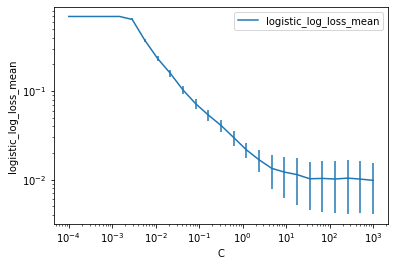


 Cross Validation Statistics
LogisticRegression(C=4.641588833612782, max_iter=10000, penalty='l1',
                   solver='saga') Hand optimal C = 4.641588833612782
hand_opt_loss_val= 0.0011981103769451687
hand_opt_loss_test= 0.04129120516842075



In [20]:
clf,data_splits = sklu.CV_optimal_param_1D(
    parameter_options = dict(C = C_options),
        data_splits=data_splits,
        #X = X,
        #y = y,

        #parameters for the type of classifier
        clf_function = linear_model.LogisticRegression,
        clf_parameters = dict(
            penalty = "l1",
             solver="saga",
             max_iter=10000, ),

        #arguments for loss function
        loss_function = sklu.logistic_log_loss,

        #arguments for the determination of the optimal parameter
        standard_error_buffer = True,
        plot_loss = True,


        #arguments for return
        return_data_splits = True,

        verbose = True,
    )

In [21]:
sklu.MSE(clf=clf,X=X_test,y_true=y_test)

0.013888888888888888

# Logistic Cross Validation Error using sklearn

In [15]:
clf = linear_model.LogisticRegressionCV(penalty = "l1",
                                     solver="saga",
                                     max_iter=10000,)
clf.fit(X_train_val,y_train_val)
print(f"Sklearn optimal C = {clf.C_}")
sklearn_opt_log_loss_val = sklu.logistic_log_loss(clf,X=X_train_val,y_true=y_train_val)
sklearn_opt_log_loss_test = sklu.logistic_log_loss(clf,X=X_test,y_true=y_test)
print(f"sklearn_opt_log_loss_val= {sklearn_opt_log_loss_val}")
print(f"sklearn_opt_log_loss_test= {sklearn_opt_log_loss_test}\n")



Sklearn optimal C = [21.5443469]
sklearn_opt_log_loss_val= 0.0006047410800658151
sklearn_opt_log_loss_test= 0.010001225350793152



# ---- Part 2: Linear SVMs ------------

  0%|          | 0/25 [00:00<?, ?it/s]

mean_opt= 0.036555840334054866 std_err_opt = 0.006369206765494776 logistic_log_loss cutoff = 0.04292504709954964
optimal_C = 0.0002872984833353666


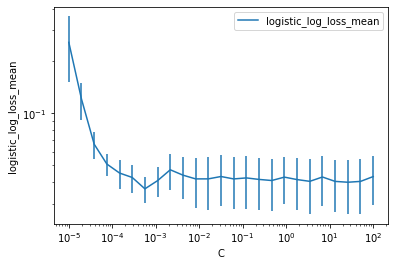


 Cross Validation Statistics
SVC(C=0.0002872984833353666, kernel='linear', probability=True) Hand optimal C = 0.0002872984833353666
hand_opt_loss_val= 0.01990013770103236
hand_opt_loss_test= 0.09290200107373767



In [22]:
clf,data_splits = sklu.CV_optimal_param_1D(
    parameter_options = dict(C = np.array([10.**(k) for k in np.linspace(-5,2,25)])),
    
    data_splits=data_splits,
    #X = X,
    #y = y,

    #parameters for the type of classifier
    clf_function = SVC,
    clf_parameters = dict(
        kernel = "linear",
        probability=True),

    #arguments for loss function
    loss_function = sklu.logistic_log_loss,#sklu.MSE,

    #arguments for the determination of the optimal parameter
    standard_error_buffer = True,
    plot_loss = True,


    #arguments for return
    return_data_splits = True,

    verbose = True,
    )

In [23]:
sklu.MSE(clf=clf,X=X_test,y_true=y_test)

0.013888888888888888

# SVM linear kernel did not have a build in cross validation Function so could not compare!